<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_Ex_PlotRelations_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [40]:
#@markdown **Just run to prepare Lab**
%%capture none
# !pip install dataprep

import pandas as pd
df = df[[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'YrSold', 'SaleType', 'SalePrice', 'GrLivArea']]
df.to_csv('house_prices.csv', index=False)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corrupt = False


# **CASE: House Prices**

In [42]:
df = pd.read_csv("house_prices.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198


# Q1. Linear Correlations

Crie gráficos de dispersão ou empregue o `pairplot` para verificar qual atributos dos imóveis apresenta maior correlação com os preços dos imóveis. Confirme isso verificando a correlação (Pearson) com o método `.corr()` ou a função `np.pearson()`. Sugestão: explore esses métodos na documentação das bibliotecas.

Q. Qual o atributo mais correlacionado aos preços e qual o valor do coeficiente (pearson) encontrado?

**Dica:** melhor com `df.select_dtypes(include='number')`

In [43]:
# sns.pairplot(df.select_dtypes(include='number')) # demora muito...

# plt.show()

In [44]:
df.select_dtypes(include='number').corr(method='pearson')['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
GrLivArea       0.708624
YearBuilt       0.522897
LotFrontage     0.351799
LotArea         0.263843
BedroomAbvGr    0.168213
YrSold         -0.028923
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

# Q2. Correlation Heatmap

Produza um `heatmap` das correlações numéricas de todas as variáveis. Inclua os valores das correlações no gráfico (parâmetro `annot`) e ajuste deamais aspectos do gráfico para que fique legível e com bom aspecto. Algumas sugestões estão nas alternativas do questionário e você pode buscar se aproximar da figura abaixo.

Q2. No ajuste do aspecto do gráfico o que pareceu ser mais útil?

In [45]:
df_corr = df.select_dtypes(include='number').corr(method='pearson')

In [46]:
#
# corrupt data
#
if corrupt:
  np.random.seed(1)
  df_corr.index = df_corr.index[np.random.permutation(len(df_corr.index))]
  for i in range(len(df_corr.columns)):
    df_corr.iloc[:,i] = df_corr.iloc[np.random.permutation(len(df_corr.index)),i]*np.random.rand(1)

  print('Data was corrupted')

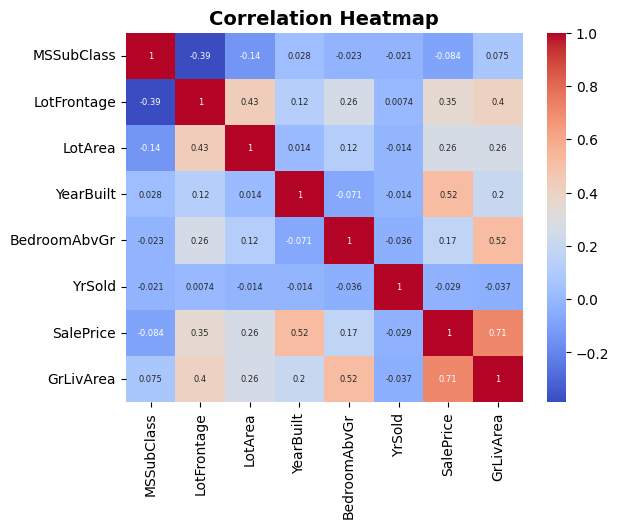

In [47]:
sns.heatmap(df_corr,cmap='coolwarm',annot=True,annot_kws={'fontsize':6})
plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()

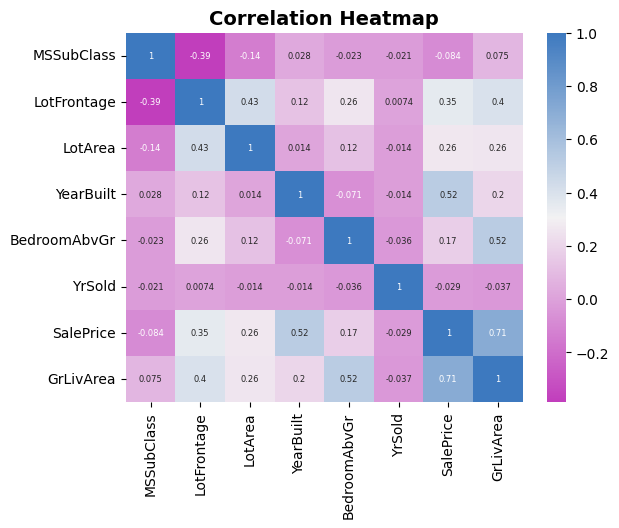

In [48]:
sns.heatmap(df_corr,
            cmap = sns.diverging_palette(
            h_neg=-50,
            h_pos=250,
            s=80,
            as_cmap=True),
            annot=True,annot_kws={'fontsize':6}
            )

plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()


# Q3. "*Nice*" Correlation Table

Use a função abaixo para produzir a tabela de correlação para os diferentes coeficientes, isto é *pearson*, *spearman* e *kendall*.

Q. Para que atributos os coeficientes divergem de orientação?

Sim, os coeficientes podem divergir!


In [49]:
import pandas as pd
from IPython.display import display, Latex, HTML

def gera_latex_table(df, titulo):
# create a latex table from a dataframe
# Created by: Rogerio de Oliveira
# Date: 2023-12-05
#
# issues: df.style.to_latex changes, replace changes


  latex_table = df.style.to_latex(hrules=True)

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  return latex_table

In [50]:
df_corr = pd.DataFrame()

for method in ['pearson', 'spearman', 'kendall']:
    df_corr[method] = df.select_dtypes(include='number').corr(method=method)['SalePrice']

df_corr = df_corr[df_corr.index != 'SalePrice'].sort_values(by='pearson',ascending=False)
df_corr

,pearson,spearman,kendall
GrLivArea,0.708624,0.731310,0.543942
YearBuilt,0.522897,0.652682,0.470960
LotFrontage,0.351799,0.409076,0.290361
LotArea,0.263843,0.456461,0.314174
BedroomAbvGr,0.168213,0.234907,0.185607
YrSold,-0.028923,-0.029899,-0.021796
MSSubClass,-0.084284,0.007192,-0.003979


In [51]:
#
# corrupt data
#
if corrupt:
  np.random.seed(1)
  df_corr.index = df_corr.index[np.random.permutation(len(df_corr.index))]
  for i in range(len(df_corr.columns)):
    df_corr.iloc[:,i] = df_corr.iloc[np.random.permutation(len(df_corr.index)),i]*np.random.rand(1)

  print('Data was corrupted')



In [52]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations')))

<IPython.core.display.Latex object>

# Q4. Outliers

Uma análise importante é a dos *outliers*. Exclua os outliers de preços e verifique se os coeficientes permanecem *robustos*.

Q. O coeficiente de *pearson* permanece robusto quanto ao atributo de maior correlação para os preços?

**Dica**: aprenda a usar `fig['fliers'][0].get_data()` do matplotlib para excluir os outliers.

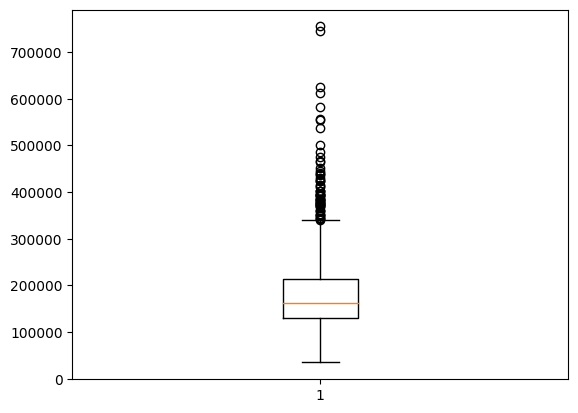

In [53]:
f = plt.boxplot(df.SalePrice)
plt.show()

In [54]:
f.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [55]:
f['fliers'][0].get_data()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000,
        386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426,
        437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000,
        402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000,
        402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000,
        395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000,
        556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500,
        381000, 410000, 466500, 377500, 394617]))

In [56]:
f['fliers'][0].get_data()[1]

array([345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000,
       386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426,
       437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000,
       402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000,
       402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000,
       395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000,
       556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500,
       381000, 410000, 466500, 377500, 394617])

In [57]:
df_nofliers = df[~df['SalePrice'].isin(f['fliers'][0].get_data()[1])]


In [58]:
df_corr = pd.DataFrame()

for method in ['pearson', 'spearman', 'kendall']:
    df_corr[method] = df_nofliers.select_dtypes(include='number').corr(method=method)['SalePrice']

df_corr = df_corr[df_corr.index != 'SalePrice'].sort_values(by='pearson',ascending=False)
df_corr

,pearson,spearman,kendall
GrLivArea,0.661325,0.705555,0.519131
YearBuilt,0.564558,0.635211,0.454670
LotFrontage,0.319597,0.381189,0.269108
LotArea,0.249812,0.418066,0.285694
BedroomAbvGr,0.201610,0.243061,0.190787
YrSold,-0.028245,-0.027247,-0.019818
MSSubClass,-0.060111,0.027379,0.010442


In [59]:
#
# corrupt data
#
if corrupt:
  np.random.seed(1)
  df_corr.index = df_corr.index[np.random.permutation(len(df_corr.index))]
  for i in range(len(df_corr.columns)):
    df_corr.iloc[:,i] = df_corr.iloc[np.random.permutation(len(df_corr.index)),i]*np.random.rand(1)

  print('Data was corrupted')

In [60]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations - NO OUTLIERS')))

<IPython.core.display.Latex object>

# Q5. Consistência do coeficiente por diferentes classes

Verifique se coeficiente de pearson para o atributo mais correlacionado é robusto para os diferentes tipos de venda `SaleType` e `MSZoning`.

Q. Para quais tipos o coeficiente se mantêm robusto?


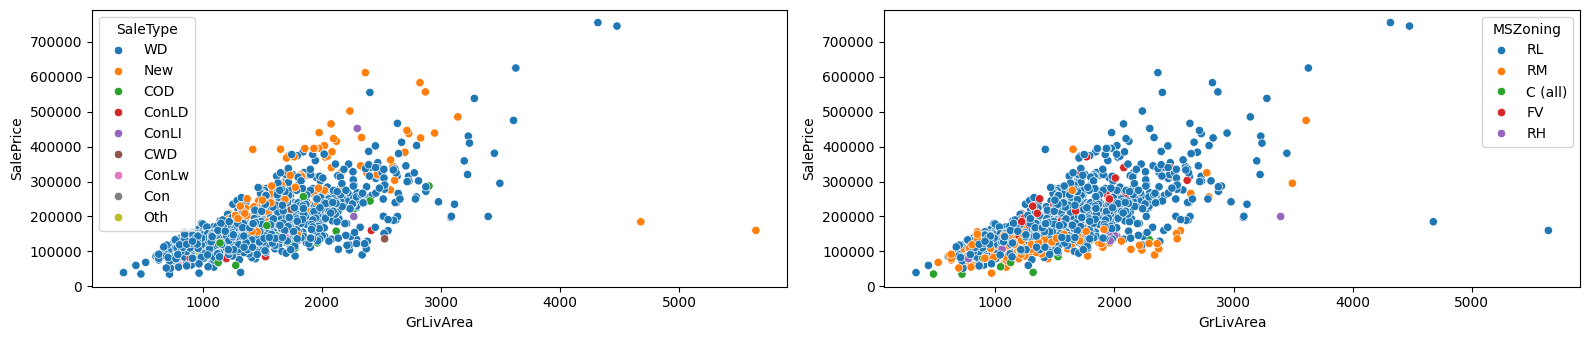

In [61]:
plt.figure(figsize=(16, 3.5))

plt.subplot(1,2,1)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['SaleType'])

plt.subplot(1,2,2)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['MSZoning'])

plt.tight_layout()
plt.show()

In [62]:
df_corr = pd.DataFrame()

for SaleType in df['SaleType'].unique():
    df_corr[SaleType] = df[df.SaleType ==  SaleType][['GrLivArea','SalePrice']].corr(method='pearson')['SalePrice']

df_corr = df_corr[df_corr.index != 'SalePrice'].T
df_corr['Qty'] = df['SaleType'].value_counts()



In [63]:
#
# corrupt data
#
if corrupt:
  np.random.seed(1)
  df_corr.index = df_corr.index[np.random.permutation(len(df_corr.index))]
  for i in range(len(df_corr.columns)):
    df_corr.iloc[:,i] = df_corr.iloc[np.random.permutation(len(df_corr.index)),i]*np.random.rand(1)

  print('Data was corrupted')

In [64]:
df_corr

,GrLivArea,Qty
WD,0.749274,1267
New,0.480039,122
COD,0.734882,43
ConLD,0.471562,9
ConLI,0.713992,5
CWD,-0.295969,4
ConLw,0.756935,5
Con,1.000000,2
Oth,0.831787,3


In [65]:
df_corr = pd.DataFrame()

for MSZoning in df['MSZoning'].unique():
    df_corr[MSZoning] = df[df.MSZoning ==  MSZoning][['GrLivArea','SalePrice']].corr(method='pearson')['SalePrice']

df_corr = df_corr[df_corr.index != 'SalePrice'].T
df_corr['Qty'] = df['MSZoning'].value_counts()



In [66]:
#
# corrupt data
#
if corrupt:
  np.random.seed(1)
  df_corr.index = df_corr.index[np.random.permutation(len(df_corr.index))]
  for i in range(len(df_corr.columns)):
    df_corr.iloc[:,i] = df_corr.iloc[np.random.permutation(len(df_corr.index)),i]*np.random.rand(1)

  print('Data was corrupted')

In [67]:
df_corr

,GrLivArea,Qty
RL,0.722593,1151
RM,0.603687,218
C (all),0.775986,10
FV,0.770267,65
RH,0.759942,16


# Q6. Preços para Novos e Outros, Linha Média

Você concluiu que os preços dos imóveis novos destoam dos demais. Vamos então produzir um gráfico para evidenciar essa análise.

Como não há uma função bem definida e não temos um modelo de função conhecido, vamos criar uma linha média de valores. Você pode empregar a função a seguir para criar os valores e criar um gráfico o mais próximo possível do abaixo.

Poste no Canvas o gráfico produzido.

In [68]:
def media_bins(num_bins,df,column_bin,column_target):
# create media bins values
# Created by: Rogerio de Oliveira
# Date: 2023-12-01
#
# issues: how put other than means?

  bin_edges = np.linspace(df[column_bin].min(), df[column_bin].max(), num_bins + 1)
  b_mean = df.groupby(pd.cut(df[column_bin], bin_edges))[column_target].mean()
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

  return bin_centers,b_mean

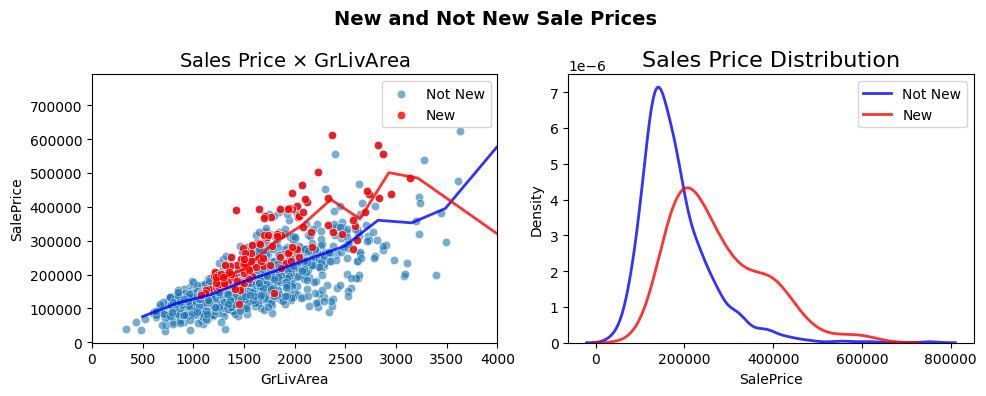

In [69]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
bin_centers,b_mean = media_bins(16,df,'GrLivArea','SalePrice')

sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],alpha=0.6,label='Not New')
sns.lineplot(x=bin_centers,y=b_mean,color='b',lw=2,alpha=0.8)

bin_centers,b_mean = media_bins(16,df[df.SaleType == 'New'],'GrLivArea','SalePrice')

sns.lineplot(x=bin_centers,y=b_mean,color='r',lw=2,alpha=0.8)
sns.scatterplot(x=df[df.SaleType == 'New']['GrLivArea'],y=df[df.SaleType == 'New']['SalePrice'],color='r',alpha=0.8,label='New')

plt.xlim([0,4000])
plt.title('Sales Price $\\times$ GrLivArea',fontsize=14)
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(x=df['SalePrice'],color='b',alpha=0.8,label='Not New',lw=2)
sns.kdeplot(x=df[df.SaleType == 'New']['SalePrice'],color='r',alpha=0.8,label='New',lw=2)

plt.title('Sales Price Distribution',fontsize=16)
plt.legend()

plt.suptitle('New and Not New Sale Prices',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()
